##### 1. Project context & data provenance

##### Ask Syracuse Data - Exploratory Analysis (Weeks 1–4)
This notebook covers dataset acquisition, schema inspection, light cleaning, and exploratory analysis for the Ask Syracuse Data project.

Data Source: Syracuse Open Data Portal  
Latest update date: 
1. Syracuse Rental Registry: 2025-12-15, updated daily
2. Vacant properties: 2025-12-15, updated daily
3. Crime: 2023-01-13, updated weekly
4. Code Violations: 2025-12-15, updated daily


The analyses in this notebook use **static CSV snapshots downloaded on the dates above**.  
No live data connections or automated updates are used. These snapshots are analyzed to 
understand data structure, quality, and analytical feasibility prior to building a 
natural-language analytics interface.


##### 2. Imports & setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### 3. Load datasets

In [4]:
vacant = pd.read_csv("Vacant_Properties.csv")
violations = pd.read_csv("Code_Violations_V2.csv")
crime = pd.read_csv("Crime_Data_2022_(Part_1_Offenses).csv")
rental = pd.read_csv("Syracuse_Rental_Registry.csv")

##### 4. Load datasets

In [6]:
def inspect_df(df, name):
    print(f"\n{name}")
    print("-" * 40)
    display(df.head())
    print(df.info())
    print("\nMissing values (%):")
    display((df.isna().mean() * 100).sort_values(ascending=False).head(10))

inspect_df(vacant, "Vacant Properties")




Vacant Properties
----------------------------------------


,X,Y,SBL,PropertyAddress,Zip,Owner,OwnerAddress,Vacant,neighborhood,VPR_result,completion_date,completion_type_name,valid_until,VPR_valid,Latitude,Longitude,ObjectId
0,NaN,NaN,002.-04-02.4,1920 Park St,13208,Wellington Ward LLC,"100 Windsor Pl Syracuse, NY 13210",Residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,-8.476690e+06,5.315382e+06,077.-23-25.0,316 Warner Ave,13205,Donna Larode,"321 Warner Ave Syracuse, NY 13205",Residential,Brighton,NaN,NaN,NaN,NaN,NaN,43.0224,-76.1474,2
2,-8.476078e+06,5.315534e+06,077.-10-15.0,2223 State St S & Amherst Ave,13205,Vladimir Dyomin,"2644 Torrey Pines Rd La Jolla, CA 92037",Residential,Brighton,VPR - Valid / Year 2,2022/12/08,VPR Cert Issued - Plan B,2023/12/08,N,43.0234,-76.1419,3
3,-8.479473e+06,5.319570e+06,109.-05-04.0,353 Richmond Ave,13204,Jason Yagan,"353 Richmond Ave Syracuse, NY 13204",Residential,Park Ave,NaN,NaN,NaN,NaN,NaN,43.0499,-76.1724,4
4,-8.475432e+06,5.320042e+06,030.-03-01.0,500 Hawley Ave & Crouse Ave N,13203,City of Syracuse,"233 E Washington St Syracuse, NY 13202",Commercial,Hawley Green,NaN,NaN,NaN,NaN,NaN,43.0530,-76.1361,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     1615 non-null   float64
 1   Y                     1615 non-null   float64
 2   SBL                   1651 non-null   object 
 3   PropertyAddress       1651 non-null   object 
 4   Zip                   1651 non-null   int64  
 5   Owner                 1651 non-null   object 
 6   OwnerAddress          1651 non-null   object 
 7   Vacant                1651 non-null   object 
 8   neighborhood          1636 non-null   object 
 9   VPR_result            375 non-null    object 
 10  completion_date       375 non-null    object 
 11  completion_type_name  375 non-null    object 
 12  valid_until           375 non-null    object 
 13  VPR_valid             375 non-null    object 
 14  Latitude              1615 non-null   float64
 15  Longitude            

valid_until             77.286493
VPR_result              77.286493
completion_type_name    77.286493
completion_date         77.286493
VPR_valid               77.286493
X                        2.180497
Y                        2.180497
Latitude                 2.180497
Longitude                2.180497
neighborhood             0.908540
dtype: float64

In [7]:
inspect_df(violations, "Code Violations")


Code Violations
----------------------------------------


,X,Y,SBL,complaint_address,complaint_zip,complaint_number,complaint_type_name,violation_id,open_date,violation_number,...,issued_to,issued_to_address,issued_to_city,issued_to_zip,inspector_id,Neighborhood,Vacant,Latitude,Longitude,ObjectId
0,-8.479951e+06,5.319677e+06,109.-08-18.0,604-06 Richmond Ave,13204,2025-09785,Property Maintenance-Int,209938,2025/12/12 16:13:41.860+00,2025-21514,...,MTH Properties LLC,35 State St,Phoenix,13135,1108,Park Ave,NaN,43.0506,-76.1767,1
1,-8.479951e+06,5.319677e+06,109.-08-18.0,604-06 Richmond Ave,13204,2025-09785,Property Maintenance-Int,209937,2025/12/12 16:13:41.860+00,2025-21513,...,MTH Properties LLC,35 State St,Phoenix,13135,1108,Park Ave,NaN,43.0506,-76.1767,2
2,-8.479951e+06,5.319677e+06,109.-08-18.0,604-06 Richmond Ave,13204,2025-09775,Property Maintenance-Int,209933,2025/12/12 11:13:47.740+00,2025-21509,...,MTH Properties LLC,35 State St,Phoenix,13135,1108,Park Ave,NaN,43.0506,-76.1767,3
3,-8.479951e+06,5.319677e+06,109.-08-18.0,604-06 Richmond Ave,13204,2025-09775,Property Maintenance-Int,209932,2025/12/12 11:13:47.740+00,2025-21508,...,MTH Properties LLC,35 State St,Phoenix,13135,1108,Park Ave,NaN,43.0506,-76.1767,4
4,-8.479951e+06,5.319677e+06,109.-08-18.0,604-06 Richmond Ave,13204,2025-04369,Property Maintenance-Int,198146,2025/05/20 08:54:19.827+00,2025-09658,...,MTH Properties LLC,35 State St,Phoenix,13135,1108,Park Ave,NaN,43.0506,-76.1767,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137663 entries, 0 to 137662
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    137614 non-null  float64
 1   Y                    137614 non-null  float64
 2   SBL                  137663 non-null  object 
 3   complaint_address    137663 non-null  object 
 4   complaint_zip        137663 non-null  int64  
 5   complaint_number     137663 non-null  object 
 6   complaint_type_name  137663 non-null  object 
 7   violation_id         137663 non-null  int64  
 8   open_date            137663 non-null  object 
 9   violation_number     137663 non-null  object 
 10  violation            137663 non-null  object 
 11  violation_date       137663 non-null  object 
 12  comply_by_date       137663 non-null  object 
 13  status_type_name     137663 non-null  object 
 14  status_date          137663 non-null  object 
 15  issued_to        

Vacant               86.242491
issued_to_zip         3.605907
issued_to_city        3.441012
Neighborhood          0.892033
issued_to_address     0.122764
Y                     0.035594
Latitude              0.035594
Longitude             0.035594
X                     0.035594
issued_to             0.002906
dtype: float64

In [8]:
inspect_df(rental, "Rental Registry")


Rental Registry
----------------------------------------


,X,Y,SBL,PropertyAddress,zip,NeedsRR,inspect_period,completion_type_name,completion_date,valid_until,...,RR_ext_insp_pass,RR_ext_insp_fail,RR_int_insp_fail,RR_int_insp_pass,RR_contact_name,pc_owner,Latitude,Longitude,SHAPE,ObjectId
0,-8.476055e+06,5.322739e+06,010.-14-31.0,1300 Highland St & Sweeting Ss,13203,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Gerald Hart,43.0707,-76.1417,NaN,1
1,-8.478126e+06,5.324111e+06,001.1-01-22.0,829 Hiawatha Blvd E,13208,Yes,2015/01/11 00:00:00+00,Rental Registry Card Issued,2015/01/11 00:00:00+00,2018/01/11 00:00:00+00,...,NaN,NaN,NaN,NaN,Mark Dayger,Valiant Real Estate USA Inc,43.0797,-76.1603,NaN,2
2,-8.476055e+06,5.322739e+06,010.-14-32.0,1304 Highland St,13203,Yes,2023/01/10 00:00:00+00,NaN,1900/01/02 00:00:00+00,1900/01/02 00:00:00+00,...,NaN,NaN,NaN,NaN,Dalmat Istogu,EMATHIA REX LLC,43.0707,-76.1417,NaN,3
3,-8.478538e+06,5.323151e+06,002.-05-02.0,326-28 Hiawatha Blvd E,13208,Yes,2025/10/22 00:00:00+00,NaN,1900/01/02 00:00:00+00,1900/01/02 00:00:00+00,...,NaN,NaN,NaN,NaN,Victor Stasyuk,Victor Stasyuk,43.0734,-76.1640,NaN,4
4,-8.476055e+06,5.322755e+06,010.-14-33.0,1308 Highland St,13203,Yes,2023/01/10 00:00:00+00,NaN,1900/01/02 00:00:00+00,1900/01/02 00:00:00+00,...,NaN,NaN,NaN,NaN,Dalmat Istogu,EMATHIA REX LLC,43.0708,-76.1417,NaN,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     10829 non-null  float64
 1   Y                     10829 non-null  float64
 2   SBL                   11085 non-null  object 
 3   PropertyAddress       11085 non-null  object 
 4   zip                   11085 non-null  int64  
 5   NeedsRR               11085 non-null  object 
 6   inspect_period        8549 non-null   object 
 7   completion_type_name  5247 non-null   object 
 8   completion_date       8549 non-null   object 
 9   valid_until           8549 non-null   object 
 10  RRisValid             11085 non-null  object 
 11  RR_app_received       7313 non-null   object 
 12  RR_ext_insp_pass      4873 non-null   object 
 13  RR_ext_insp_fail      596 non-null    object 
 14  RR_int_insp_fail      864 non-null    object 
 15  RR_int_insp_pass   

SHAPE                   100.000000
RR_ext_insp_fail         94.623365
RR_int_insp_fail         92.205683
RR_int_insp_pass         59.052774
RR_ext_insp_pass         56.039693
completion_type_name     52.665765
RR_app_received          34.027966
RR_contact_name          23.410014
completion_date          22.877763
inspect_period           22.877763
dtype: float64

In [9]:
inspect_df(crime, "Crime 2022 Part 1")


Crime 2022 Part 1
----------------------------------------


,DATEEND,TIMESTART,TIMEEND,ADDRESS,CODE_DEFINED,Arrest,LarcenyCode,ObjectID
0,2022/12/31 00:00:00+00,0432,432,1 DESTINY USA DR,BURGLARY,NaN,From Building,126006
1,2022/12/31 00:00:00+00,2101,2101,100 HUNT AV,AGGRAVATED ASSAULT,Yes,NaN,126007
2,2022/12/31 00:00:00+00,1203,1203,1900 ERIE BLVD W,AGGRAVATED ASSAULT,Yes,NaN,126008
3,2022/12/31 00:00:00+00,1743,1743,200 WESTMORELAND AV,MV THEFT,NaN,Motor Vehicle,126009
4,2022/12/31 00:00:00+00,1840,1840,4700 ONONDAGA BLVD,LARCENY,NaN,From Building,126010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5660 entries, 0 to 5659
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATEEND       5660 non-null   object
 1   TIMESTART     5660 non-null   object
 2   TIMEEND       5660 non-null   int64 
 3   ADDRESS       5660 non-null   object
 4   CODE_DEFINED  5660 non-null   object
 5   Arrest        1346 non-null   object
 6   LarcenyCode   4005 non-null   object
 7   ObjectID      5660 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 353.9+ KB
None

Missing values (%):


Arrest          76.219081
LarcenyCode     29.240283
DATEEND          0.000000
TIMESTART        0.000000
ADDRESS          0.000000
TIMEEND          0.000000
CODE_DEFINED     0.000000
ObjectID         0.000000
dtype: float64

##### Schema Observations

- Vacant Properties and Rental Registry both contain **SBL**, which can be used 
  as a primary parcel-level join key.
- Code Violations does not consistently include SBL but includes address, ZIP, 
  and latitude/longitude.
- Crime data is anonymized to the block level and is event-based, not parcel-based.
- Date fields vary in format and completeness across datasets.


##### 5. Basic cleaning

In [10]:
def clean_columns(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
    )
    return df

vacant = clean_columns(vacant)
violations = clean_columns(violations)
rental = clean_columns(rental)
crime = clean_columns(crime)


In [21]:
rental.columns = (
    rental.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
rental.columns

Index(['x', 'y', 'sbl', 'propertyaddress', 'zip', 'needsrr', 'inspect_period',
       'completion_type_name', 'completion_date', 'valid_until', 'rrisvalid',
       'rr_app_received', 'rr_ext_insp_pass', 'rr_ext_insp_fail',
       'rr_int_insp_fail', 'rr_int_insp_pass', 'rr_contact_name', 'pc_owner',
       'latitude', 'longitude', 'shape', 'objectid'],
      dtype='object')

In [ ]:
crime.columns = (
    crime.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
crime.columns

Index(['dateend', 'timestart', 'timeend', 'address', 'code_defined', 'arrest',
       'larcenycode', 'objectid'],
      dtype='object')

In [13]:
date_cols_violations = ["open_date", "violation_date", "status_date"]
for col in date_cols_violations:
    if col in violations.columns:
        violations[col] = pd.to_datetime(violations[col], errors="coerce")

date_cols_rental = ["completion_date", "valid_until"]
for col in date_cols_rental:
    if col in rental.columns:
        rental[col] = pd.to_datetime(rental[col], errors="coerce")

crime["dateend"] = pd.to_datetime(crime["dateend"], errors="coerce")


##### 6. Exploratory analysis (EDA)

In [14]:
vacant["vpr_valid"].value_counts(dropna=False)


vpr_valid
NaN    1276
Y       198
N       177
Name: count, dtype: int64

In [15]:
vacant.groupby("zip").size().sort_values(ascending=False).head(10)


zip
13205    533
13204    345
13208    228
13203    186
13207     94
13210     91
13206     86
13224     56
13202     25
13214      5
dtype: int64

In [16]:
violations["status_type_name"].value_counts()


status_type_name
Closed    119502
Open       18161
Name: count, dtype: int64

In [17]:
violations["violation"].value_counts().head(10)


violation
SPCC - Section 27-72 (f) - Overgrowth                                14569
SPCC - Section 27-72 (e) -Trash & Debris                              9340
2020 PMCNYS - Section 305.3 - interior surfaces                       8712
SPCC-Sec. 27-133 Registration                                         7124
SPCC 27-43 (e) (1)(2)(3)(4) Certification                             4733
2020 PMCNYS - Section 504.1 - General                                 3279
2020 PMCNYS - Section 304.13 - Window, skylight, and door frames      3242
2020 PMCNYS  - Section 605.1 - Installation                           2805
2020 PMCNYS - Section 603.1 - Mechanical equipment and appliances     2330
2020 PMCNYS - Section 309.1 - Infestation                             2319
Name: count, dtype: int64

In [18]:
violations["violation_date"].dt.year.value_counts().sort_index()


violation_date
2017.0     6266
2018.0     5810
2019.0     5146
2020.0     5421
2021.0    16014
2022.0    17749
2023.0    17760
2024.0    17421
2025.0    19632
Name: count, dtype: int64

In [22]:
rental["rrisvalid"].value_counts(dropna=False)


rrisvalid
No     6559
Yes    4526
Name: count, dtype: int64

In [23]:
vacant_sbls = set(vacant["sbl"].dropna())
violations["is_vacant_property"] = violations["vacant"].notna()

violations["is_vacant_property"].value_counts(normalize=True) * 100


is_vacant_property
False    86.242491
True     13.757509
Name: proportion, dtype: float64

In [24]:
crime["code_defined"].value_counts()


code_defined
LARCENY               2601
BURGLARY              1190
AGGRAVATED ASSAULT     954
MV THEFT               602
ROBBERY                296
MURDER                  17
Name: count, dtype: int64

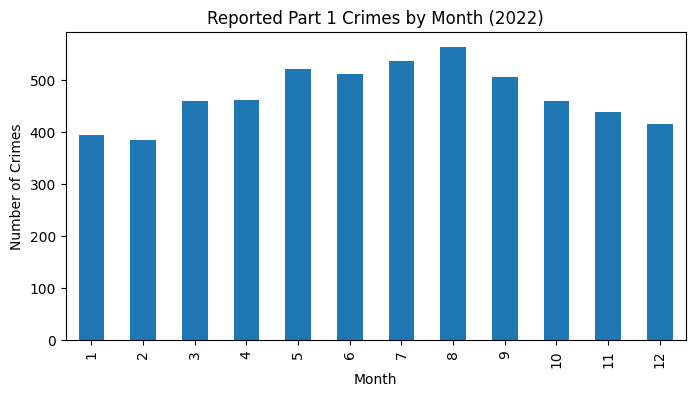

In [26]:
crime.groupby(crime["dateend"].dt.month).size().plot(kind="bar", figsize=(8,4))
plt.title("Reported Part 1 Crimes by Month (2022)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()


Crime reports show seasonal variation, with higher counts during warmer months.
This pattern is consistent with findings in other urban contexts and warrants further investigation.

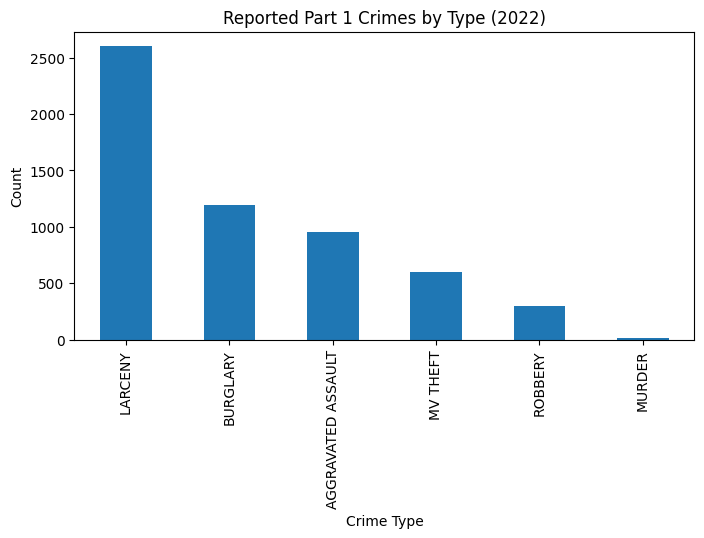

In [35]:
crime["code_defined"].value_counts().plot(
    kind="bar", figsize=(8,4)
)
plt.title("Reported Part 1 Crimes by Type (2022)")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.show()


Larceny-theft accounts for the largest share of Part 1 crimes in 2022.
This distribution highlights the importance of separating property crimes
from violent offenses in public discussion.

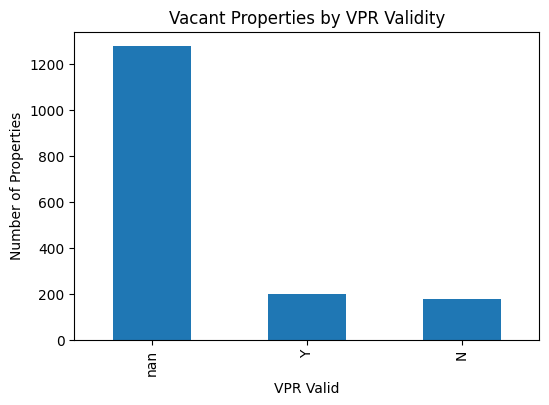

In [ ]:
# Vacant Properties – VPR Validity
vacant["vpr_valid"].value_counts(dropna=False).plot(
    kind="bar", figsize=(6,4)
)
plt.title("Vacant Properties by VPR Validity")
plt.xlabel("VPR Valid")
plt.ylabel("Number of Properties")
plt.show()


This chart shows the distribution of vacant properties by Vacant Property Registry (VPR) status.
A non-trivial number of vacant properties do not have a valid VPR certificate, which may
indicate gaps in compliance or enforcement.


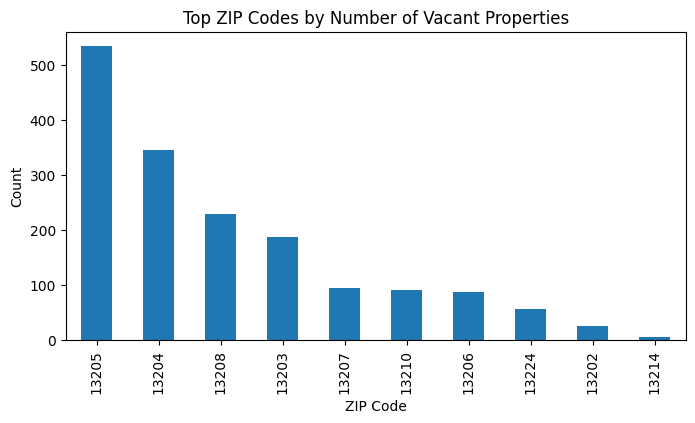

In [ ]:
# Vacant Properties by ZIP Code
vacant["zip"].value_counts().head(10).plot(
    kind="bar", figsize=(8,4)
)
plt.title("Top ZIP Codes by Number of Vacant Properties")
plt.xlabel("ZIP Code")
plt.ylabel("Count")
plt.show()


Vacant properties are not evenly distributed across the city.
Certain ZIP codes contain a disproportionately high number of vacant parcels,
suggesting geographic concentration of housing disinvestment.

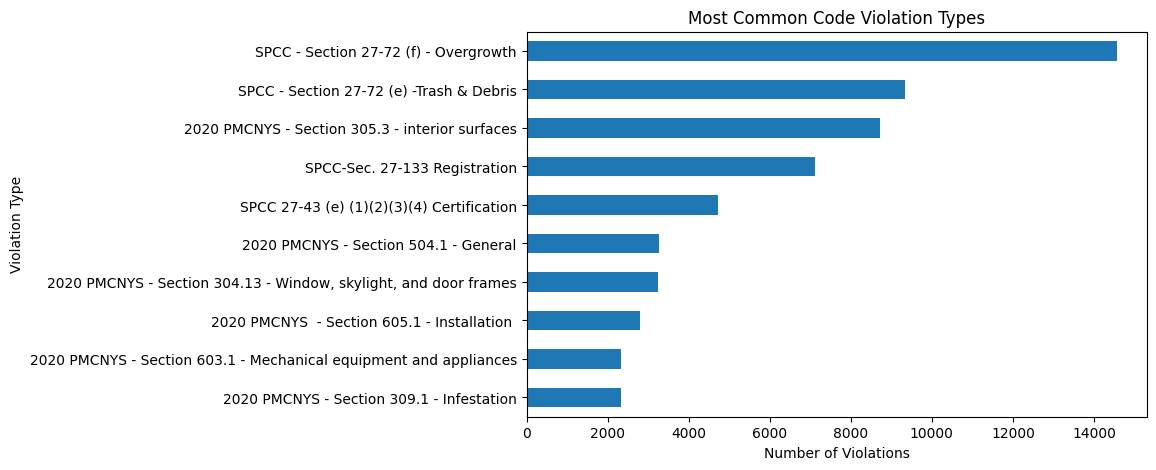

In [ ]:
# Most Common Code Violation Types
violations["violation"].value_counts().head(10).plot(
    kind="barh", figsize=(8,5)
)
plt.title("Most Common Code Violation Types")
plt.xlabel("Number of Violations")
plt.ylabel("Violation Type")
plt.gca().invert_yaxis()
plt.show()


A small number of violation types account for a large share of total code violations.
This suggests that targeted interventions addressing these recurring issues
could have outsized impact.


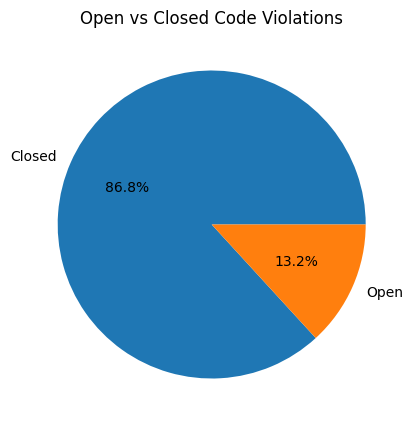

In [ ]:
# Open vs Closed Code Violations
violations["status_type_name"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", figsize=(5,5)
)
plt.title("Open vs Closed Code Violations")
plt.ylabel("")
plt.show()


Most violations in the dataset have been closed, but a meaningful portion remain open.
Open violations may indicate prolonged compliance challenges or enforcement delays.

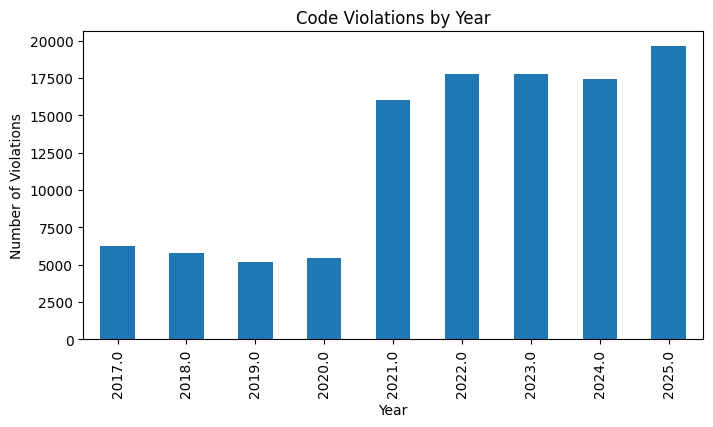

In [34]:
# Code Violations Over Time (Yearly)
violations["violation_date"].dt.year.value_counts().sort_index().plot(
    kind="bar", figsize=(8,4)
)
plt.title("Code Violations by Year")
plt.xlabel("Year")
plt.ylabel("Number of Violations")
plt.show()


Code violations vary substantially by year, reflecting potential changes in enforcement
activity, housing conditions, or reporting practices.

##### 7. Initial observations & limitations

## Initial Findings

- A substantial number of vacant properties do not have a valid Vacant Property Registry certificate.
- Code violations are concentrated in a small number of violation categories.
- A non-trivial portion of violations are associated with parcels flagged as vacant.
- Crime incidents show seasonal variation across months in 2022.

## Limitations

- The analysis uses static snapshots and does not reflect real-time updates.
- Crime data is anonymized to block level, limiting parcel-level attribution.
- Address-based joins may introduce inconsistencies without spatial matching.
- Registry data may not fully reflect enforcement status.
